In [1]:
# Install a pip package in the current Jupyter kernel
import sys
# !{sys.executable} -m pip install astroquery
# !{sys.executable} -m pip install boto3

In [2]:
import os
import pandas as pd
from astroquery.mast import Observations
from credentials import AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY

In [3]:
# If credential environment are not already set, we can set them within python.
os.environ['AWS_ACCESS_KEY_ID'] = AWS_ACCESS_KEY_ID
os.environ['AWS_SECRET_ACCESS_KEY'] = AWS_SECRET_ACCESS_KEY

In [4]:
# If your profile is not called [default], update the next line:
# Observations.enable_cloud_dataset(provider='AWS', profile='Dean')
Observations.enable_cloud_dataset(provider='AWS')

INFO: Using the S3 STScI public dataset [astroquery.mast.cloud]
INFO: See Request Pricing in https://aws.amazon.com/s3/pricing/ for details [astroquery.mast.cloud]
INFO: If you have not configured boto3, follow the instructions here: https://boto3.readthedocs.io/en/latest/guide/configuration.html [astroquery.mast.cloud]


# Try Getting Cloud URIs

In [8]:
# Getting the cloud URIs
obs_table = Observations.query_criteria(obs_collection='HST',
                                        filters='F606W',
                                        instrument_name='ACS/WFC',
                                        proposal_id=['12062'],
                                        dataRights='PUBLIC')
products = Observations.get_product_list(obs_table)
filtered = Observations.filter_products(products,
                                        productSubGroupDescription='DRZ')
s3_uris = Observations.get_cloud_uris(filtered)
print(s3_uris)

[None, None, None, None, None, None, None, None, None, None, None, None, 's3://stpubdata/hst/public/jbev/jbeveo010/jbeveo010_drz.fits', 's3://stpubdata/hst/public/jbev/jbevet010/jbevet010_drz.fits']


# Download Kepler Data

In [45]:
# Downloading from the cloud
obs_table = Observations.query_criteria(obs_collection=['Kepler'],
                                        objectname="KIC 3120320", 
                                        dataproduct_type="timeseries",
                                        radius=0)
products = Observations.get_product_list(obs_table[0])
products = Observations.filter_products(products,
                                       extension="fits",
                                       productType="SCIENCE")
# manifest = Observations.download_products(products[:10], cloud_only=True)
manifest = Observations.download_products(products, cloud_only=True)

In [46]:
products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid
str10,str6,str10,str36,str59,str1,str110,str9,str28,str8,str1,str6,str1,str2,str44,int64,str10
9000122074,Kepler,timeseries,kplr003120320_lc_Q111111111111111111,Lightcurve Long Cadence (CLC) - Q0,C,mast:Kepler/url/missions/kepler/lightcurves/0031/003120320/kplr003120320-2009131105131_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr003120320-2009131105131_llc.fits,77760,9000122074
9000122074,Kepler,timeseries,kplr003120320_lc_Q111111111111111111,Lightcurve Long Cadence (CLC) - Q1,C,mast:Kepler/url/missions/kepler/lightcurves/0031/003120320/kplr003120320-2009166043257_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr003120320-2009166043257_llc.fits,192960,9000122074
9000122074,Kepler,timeseries,kplr003120320_lc_Q111111111111111111,Lightcurve Long Cadence (CLC) - Q2,C,mast:Kepler/url/missions/kepler/lightcurves/0031/003120320/kplr003120320-2009259160929_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr003120320-2009259160929_llc.fits,466560,9000122074
9000122074,Kepler,timeseries,kplr003120320_lc_Q111111111111111111,Lightcurve Long Cadence (CLC) - Q3,C,mast:Kepler/url/missions/kepler/lightcurves/0031/003120320/kplr003120320-2009350155506_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr003120320-2009350155506_llc.fits,466560,9000122074
9000122074,Kepler,timeseries,kplr003120320_lc_Q111111111111111111,Lightcurve Long Cadence (CLC) - Q4,C,mast:Kepler/url/missions/kepler/lightcurves/0031/003120320/kplr003120320-2010078095331_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr003120320-2010078095331_llc.fits,469440,9000122074
9000122074,Kepler,timeseries,kplr003120320_lc_Q111111111111111111,Lightcurve Long Cadence (CLC) - Q5,C,mast:Kepler/url/missions/kepler/lightcurves/0031/003120320/kplr003120320-2010174085026_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr003120320-2010174085026_llc.fits,492480,9000122074
9000122074,Kepler,timeseries,kplr003120320_lc_Q111111111111111111,Lightcurve Long Cadence (CLC) - Q6,C,mast:Kepler/url/missions/kepler/lightcurves/0031/003120320/kplr003120320-2010265121752_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr003120320-2010265121752_llc.fits,469440,9000122074
9000122074,Kepler,timeseries,kplr003120320_lc_Q111111111111111111,Lightcurve Long Cadence (CLC) - Q7,C,mast:Kepler/url/missions/kepler/lightcurves/0031/003120320/kplr003120320-2010355172524_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr003120320-2010355172524_llc.fits,466560,9000122074
9000122074,Kepler,timeseries,kplr003120320_lc_Q111111111111111111,Lightcurve Long Cadence (CLC) - Q8,C,mast:Kepler/url/missions/kepler/lightcurves/0031/003120320/kplr003120320-2011073133259_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX,kplr003120320-2011073133259_llc.fits,357120,9000122074


In [47]:
print(manifest["Status"])

 Status 
--------
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE


# Download TESS Data

In [6]:
# Downloading from the cloud
obs_table = Observations.query_criteria(obs_collection=['TESS'],
                                        objectname="TIC 137549183",
                                        radius=0)
products = Observations.get_product_list(obs_table[0])
# products = Observations.filter_products(products,
#                                        dataproduct_type="timeseries",
#                                        extension="fits",
#                                        productType="SCIENCE",
#                                        productSubGroupDescription,"LC")
# manifest = Observations.download_products(products[:10], cloud_only=True)

In [7]:
products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid
str11,str4,str10,str47,str33,str1,str81,str9,str28,str3,str1,str4,str20,str15,str63,int64,str11
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,full data validation report,S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-00240_dvr.pdf,AUXILIARY,--,DVR,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-00240_dvr.pdf,9825732,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,full data validation report (xml),S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-00240_dvr.xml,AUXILIARY,--,DVR,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-00240_dvr.xml,109908,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,full data validation report,S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-00290_dvr.pdf,AUXILIARY,--,DVR,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-00290_dvr.pdf,19725953,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,full data validation report (xml),S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-00290_dvr.xml,AUXILIARY,--,DVR,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-00290_dvr.xml,221607,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,data validation mini report,S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-00240_dvm.pdf,AUXILIARY,Minimum Recommended Products,DVM,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-00240_dvm.pdf,4855740,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,data validation mini report,S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-00290_dvm.pdf,AUXILIARY,Minimum Recommended Products,DVM,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-00290_dvm.pdf,6774245,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,TCE summary report,S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-01-00240_dvs.pdf,AUXILIARY,Minimum Recommended Products,DVS,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-01-00240_dvs.pdf,701848,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,TCE summary report,S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-01-00290_dvs.pdf,AUXILIARY,Minimum Recommended Products,DVS,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-01-00290_dvs.pdf,648098,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,TCE summary report,S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-02-00290_dvs.pdf,AUXILIARY,Minimum Recommended Products,DVS,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-02-00290_dvs.pdf,596152,17000950358


In [48]:
# Downloading from the cloud
obs_table = Observations.query_criteria(obs_collection=['TESS'],
                                        objectname="TIC 137549183",
                                        radius=0)
products = Observations.get_product_list(obs_table[0])
products = Observations.filter_products(products,
                                       dataproduct_type="timeseries",
                                       extension="fits",
                                       productType="SCIENCE",
                                       productSubGroupDescription,"LC")
manifest = Observations.download_products(products[:10], cloud_only=True)

In [44]:
products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid
str11,str4,str10,str47,str33,str1,str81,str9,str28,str3,str1,str4,str20,str15,str63,int64,str11
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,Data validation time series,S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-00240_dvt.fits,SCIENCE,Minimum Recommended Products,DVT,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-00240_dvt.fits,3899520,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,Data validation time series,S,mast:TESS/product/tess2019199201929-s0014-s0014-0000000137549183-00290_dvt.fits,SCIENCE,Minimum Recommended Products,DVT,--,SPOC,f997d78fe0,G022062_G022204,tess2019199201929-s0014-s0014-0000000137549183-00290_dvt.fits,4760640,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,Light curves,S,mast:TESS/product/tess2019198215352-s0014-0000000137549183-0150-s_lc.fits,SCIENCE,Minimum Recommended Products,LC,--,SPOC,f997d78fe0,G022062_G022204,tess2019198215352-s0014-0000000137549183-0150-s_lc.fits,1964160,17000950358
17000950358,TESS,timeseries,tess2019198215352-s0014-0000000137549183-0150-s,Target pixel files,S,mast:TESS/product/tess2019198215352-s0014-0000000137549183-0150-s_tp.fits,SCIENCE,Minimum Recommended Products,TP,--,SPOC,spoc-4.0.28-20200407,G022062_G022204,tess2019198215352-s0014-0000000137549183-0150-s_tp.fits,47376000,17000950358


In [30]:
print(manifest["Status"])

 Status 
--------
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE
COMPLETE


In [84]:
def number_of_timeseries(tic):
    # supply TIC
    # restrict the mission to TESS
    try:
        objectname = "TIC " + str(tic)
        obs_table = Observations.query_criteria(obs_collection=['TESS'],
                                            objectname=objectname,
                                            radius=0)

        if len(obs_table) > 0:
            products = Observations.get_product_list(obs_table[0])
            products = Observations.filter_products(products,
                                                   dataproduct_type="timeseries",
                                                   extension="fits",
                                                   productType="SCIENCE")
        else:
            return 0
    except Exception as e:
        return -1
    
    return len(products)

In [85]:
def number_of_light_curves(tic):
    # supply TIC
    # restrict the mission to TESS
    try:
        objectname = "TIC " + str(tic)
        obs_table = Observations.query_criteria(obs_collection=['TESS'],
                                            objectname=objectname,
                                            radius=0)

        if len(obs_table) > 0:
            products = Observations.get_product_list(obs_table[0])
            products = Observations.filter_products(products,
                                                   dataproduct_type="timeseries",
                                                   extension="fits",
                                                   productType="SCIENCE",
                                                   productSubGroupDescription="LC")
        else:
            return 0
    except Exception as e:
        return -1
    
    return len(products)

In [8]:
def number_of_target_pixel_files(tic):
    # supply TIC
    # restrict the mission to TESS
    try:
        objectname = "TIC " + str(tic)
        obs_table = Observations.query_criteria(obs_collection=['TESS'],
                                            objectname=objectname,
                                            radius=0)

        if len(obs_table) > 0:
            products = Observations.get_product_list(obs_table[0])
            products = Observations.filter_products(products,
                                                   dataproduct_type="timeseries",
                                                   extension="fits",
                                                   productType="SCIENCE",
                                                   productSubGroupDescription="TP")
        else:
            return 0
    except Exception as e:
        return -1
    
    return len(products)

In [9]:
number_of_target_pixel_files(137549183)

1

In [68]:
number_of_light_curves(137549183)

4

# light curve counts

In [56]:
joined_df = pd.read_csv("joined.csv")
joined_df.head()

,kic,tic
0,757099,122785244
1,892667,122785148
2,1025986,122784720
3,1026133,122784832
4,1026133,122784832


In [69]:
joined_df.head()["tic"].apply(number_of_light_curves)

0    0
1    0
2    0
3    0
4    0
Name: tic, dtype: int64

In [70]:
joined_df["tess_light_curves"] = joined_df["tic"].apply(number_of_light_curves)

In [75]:
# no connection errors
len(joined_df[joined_df["tess_light_curves"] == -1])

0

In [76]:
joined_df.head()

,kic,tic,tess_light_curves
0,757099,122785244,0
1,892667,122785148,0
2,1025986,122784720,0
3,1026133,122784832,0
4,1026133,122784832,0


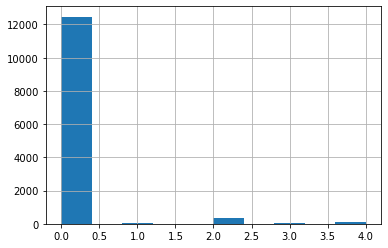

In [78]:
joined_df["tess_light_curves"].hist()

In [73]:
# 550 of the TICs have light curves
len(joined_df[joined_df["tess_light_curves"] > 0])

550

In [74]:
# out of a total of 13017 TICs
len(joined_df)

13017

In [79]:
joined_df.to_csv("joined_with_tess_lc_counts.csv")

In [80]:
joined_df[joined_df["tess_light_curves"] > 0].head()

,kic,tic,tess_light_curves
7,1026957,137099260,2
122,2010607,122507978,2
168,2164791,137637285,2
169,2164791,137637285,2
297,2571868,122452155,2


In [94]:
joined_df[joined_df["tess_light_curves"] > 0].tail(20)

,kic,tic,tess_light_curves,tess_timeseries
12902,12405950,406998744,1,2
12903,12405950,406998744,1,2
12904,12405950,406998744,1,2
12905,12405950,406998744,1,2
12906,12405950,406998744,1,2
12907,12405950,406998744,1,2
12908,12405950,406998744,1,2
12919,12418816,27843942,1,4
12920,12418816,27843942,1,4
12944,12507325,416267120,1,2


# target pixel file counts

In [10]:
joined_df = pd.read_csv("joined.csv")
joined_df.head()

,kic,TCE_ID,tic,disposition,not_transit,pn,n_plan,period
0,757099,000757099-01,122785244,FP,1,1,1,0.723930
1,892667,000892667-01,122785148,FP,1,1,1,2.262005
2,1025986,001025986-01,122784720,FP,1,1,1,275.071787
3,1026133,001026133-01,122784832,FP,1,1,2,1.346373
4,1026133,001026133-02,122784832,FP,1,2,2,186.181229


In [11]:
joined_df["target_pixel_files"] = joined_df["tic"].apply(number_of_target_pixel_files)

In [12]:
# connection errors?
len(joined_df[joined_df["target_pixel_files"] == -1])

4

In [13]:
joined_df.head()

,kic,TCE_ID,tic,disposition,not_transit,pn,n_plan,period,target_pixel_files
0,757099,000757099-01,122785244,FP,1,1,1,0.723930,0
1,892667,000892667-01,122785148,FP,1,1,1,2.262005,0
2,1025986,001025986-01,122784720,FP,1,1,1,275.071787,0
3,1026133,001026133-01,122784832,FP,1,1,2,1.346373,0
4,1026133,001026133-02,122784832,FP,1,2,2,186.181229,0


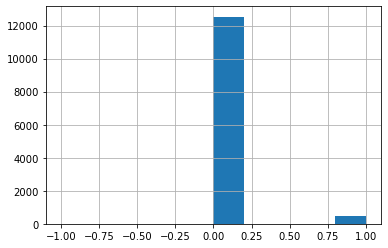

In [14]:
joined_df["target_pixel_files"].hist()

In [15]:
# 550 of the TICs have light curves
len(joined_df[joined_df["target_pixel_files"] > 0])

478

In [16]:
joined_df.to_csv("joined_with_tess_tp_counts.csv")

# Download More TESS Data

In [5]:
obs_table = Observations.query_criteria(obs_collection=['TESS'],
                                        objectname="TIC 272489100",
                                        radius=0)
products = Observations.get_product_list(obs_table[0])
products = Observations.filter_products(products,
                                       dataproduct_type="timeseries",
                                       extension="fits",
                                       productType="SCIENCE",
                                       productSubGroupDescription="LC")
manifest = Observations.download_products(products[:10], cloud_only=True)

In [83]:
obs_table = Observations.query_criteria(obs_collection=['TESS'],
                                        objectname="TIC 122507978",
                                        radius=0)
products = Observations.get_product_list(obs_table[0])
products = Observations.filter_products(products,
                                       dataproduct_type="timeseries",
                                       extension="fits",
                                       productType="SCIENCE",
                                       productSubGroupDescription="LC")
manifest = Observations.download_products(products[:10], cloud_only=True)

In [87]:
joined_df["tess_timeseries"] = joined_df["tess_light_curves"]

In [91]:
joined_df.loc[joined_df["tess_timeseries"] > 0, "tess_light_curves"] = joined_df[joined_df["tess_timeseries"] > 0]["tic"].apply(number_of_light_curves)

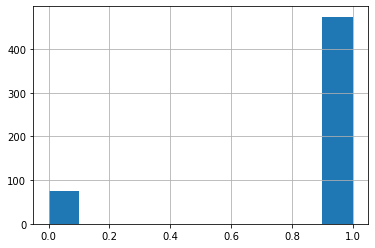

In [92]:
joined_df[joined_df["tess_timeseries"] > 0]["tess_light_curves"].hist()

In [21]:
Observations.disable_cloud_dataset()